In [ ]:
# Problem 1
# a)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# convert data to a dataframe
def output_to_df(output):
  column_names = [
      "RequestID",
      "ClientRequestTimestamp",
      "ClientRequestLength",
      "ReceiptTimestamp",
      "StartTimestamp",
      "CompletionTimestamp",
      "QueueLength"
  ]

  data = {col: [] for col in column_names}
  with open(output, "r") as file:
    for line in file:
      t = line.strip().split(",")
      if len(t) != 7:
        continue

      request_id, request_timestamp, length, receipt_timestamp, start_timestamp, completion_timestamp, queue_length = t
      data["RequestID"].append(request_id.strip())
      data["ClientRequestTimestamp"].append(float(request_timestamp.strip()))
      data["ClientRequestLength"].append(float(length.strip()))
      data["ReceiptTimestamp"].append(float(receipt_timestamp.strip()))
      data["StartTimestamp"].append(float(start_timestamp.strip()))
      data["CompletionTimestamp"].append(float(completion_timestamp.strip()))
      data["QueueLength"].append(float(queue_length.strip()))

    df = pd.DataFrame(data)

    total_busy_time = 0
    for i in range(len(df["ClientRequestLength"])):
      total_busy_time += (df["CompletionTimestamp"][i] - df["StartTimestamp"][i])

    total_time = df["CompletionTimestamp"].iloc[-1] - df["ClientRequestTimestamp"].iloc[0]

    utilization = total_busy_time / total_time

    queueingTime = df["StartTimestamp"] - df["ClientRequestTimestamp"]
    serviceTime = df["CompletionTimestamp"] - df["StartTimestamp"]
    df["ResponseTime"] = queueingTime + serviceTime

    df["QueueLengthTime"] = df["CompletionTimestamp"].shift(-1) - df["CompletionTimestamp"]

    df["Inter-arrivalTime"] = df["ReceiptTimestamp"].shift(-1) - df["ReceiptTimestamp"]

    avg_queue_length = 0
    for i in range(len(df["QueueLength"]) - 1):
      avg_queue_length += df["QueueLength"][i] * df["QueueLengthTime"][i] / total_time

    avg_response_time = df["ResponseTime"].mean()

    return utilization, avg_response_time, df


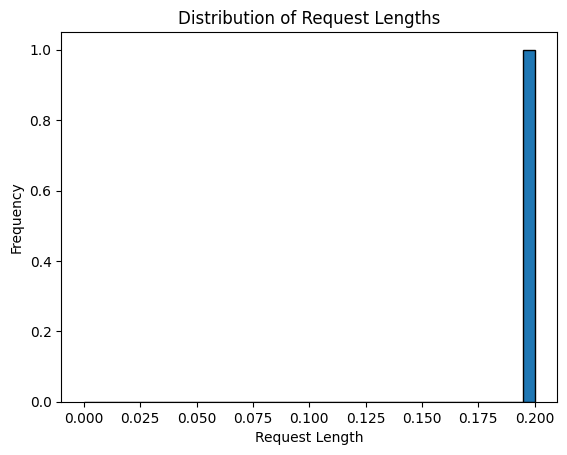

In [ ]:
# Plot request length
_, _, data = output_to_df("output-1a.txt")
request_length_data = data["ClientRequestLength"]
bin_size = 0.005
bins = np.arange(0, max(request_length_data) + bin_size, bin_size)
weights = np.ones(len(request_length_data)) / 1500

plt.hist(request_length_data, bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Request Lengths')
plt.xlabel('Request Length')
plt.ylabel('Frequency')

plt.show()

All of the request lengths seem to be the same so it has a mean of 0.2 seconds with standard deviation 0.

Inter-arrival Mean: 0.21895949032688944


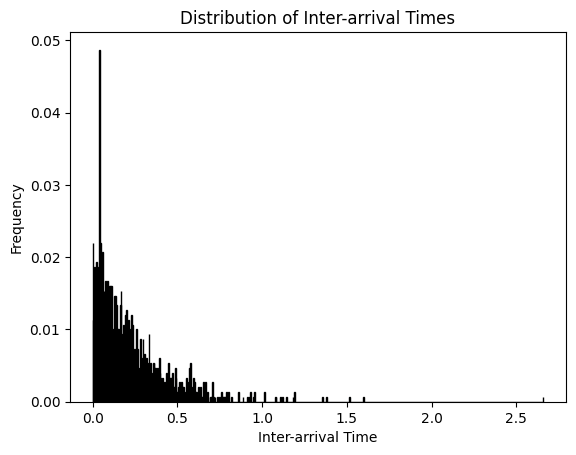

In [ ]:
# Plot the data
_, _, data = output_to_df("output-1a.txt")
inter_arrival_data = data["Inter-arrivalTime"]
print("Inter-arrival Mean:", inter_arrival_data.mean())
bin_size = 0.005
bins = np.arange(0, max(inter_arrival_data) + bin_size, bin_size)
weights = np.ones(len(inter_arrival_data)) / 1499

plt.hist(inter_arrival_data, bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Inter-arrival Times')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')

plt.show()

The inter arrival times seem to still be following an exponential curve with a mean of 0.22 seconds.

Inter-arrival Mean: 0.21933963108739693


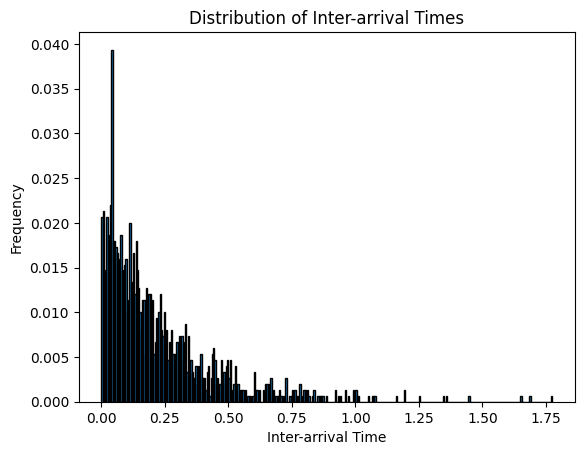

In [ ]:
# b)
_, _, data = output_to_df("output-1b.txt")
inter_arrival_data = data["Inter-arrivalTime"]
print("Inter-arrival Mean:", inter_arrival_data.mean())
bin_size = 0.005
bins = np.arange(0, max(inter_arrival_data) + bin_size, bin_size)
weights = np.ones(len(inter_arrival_data)) / 1499

plt.hist(inter_arrival_data, bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Inter-arrival Times')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')

plt.show()

The inter arrival times seem to be following the same distribution as above, so it seems that the -d parameter does not affect the distribution of inter arrival times.

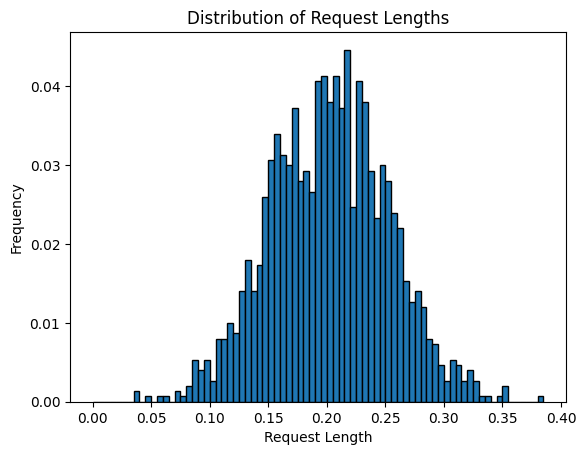

Mean: 0.20219557866666665
Standard Deviation: 0.05041654608061205


In [ ]:
# Plot request length
_, _, data = output_to_df("output-1b.txt")
request_length_data = data["ClientRequestLength"]
bin_size = 0.005
bins = np.arange(0, max(request_length_data) + bin_size, bin_size)
weights = np.ones(len(request_length_data)) / 1500

plt.hist(request_length_data, bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Request Lengths')
plt.xlabel('Request Length')
plt.ylabel('Frequency')

plt.show()

print("Mean:", np.mean(request_length_data))
print("Standard Deviation:", np.std(request_length_data))

This distribution seems to be a normal distribution with mean of roughly 0.2 seconds, just as the previous one, but with a standard deviation of 0.05 seconds.

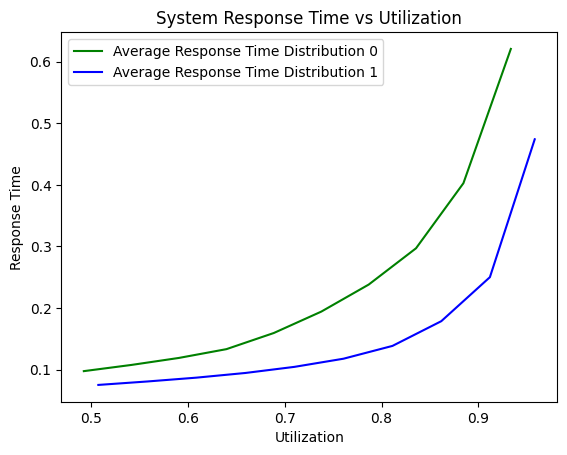

In [ ]:
# c)
utilization1 = [0] * 10
avg_response_time1 = [0] * 10

utilization2 = [0] * 10
avg_response_time2 = [0] * 10

for i in range(10):
  utilization1[i], avg_response_time1[i], _ = output_to_df(f"output-2c-{i}.txt")

for i in range(10):
  utilization2[i] , avg_response_time2[i], _ = output_to_df(f"output-1d-{i}.txt")


fig, ax = plt.subplots()

ax.set_title("System Response Time vs Utilization")
ax.set_xlabel("Utilization")
ax.set_ylabel("Response Time")

ax.plot(utilization1, avg_response_time1, color="green", label="Average Response Time Distribution 0")
ax.plot(utilization2, avg_response_time2, color="blue", label="Average Response Time Distribution 1")

ax.legend()

It appears that users will experience better response times with distribution 1 than distribution 0.

Rejected Requests Ratio: 83:1417


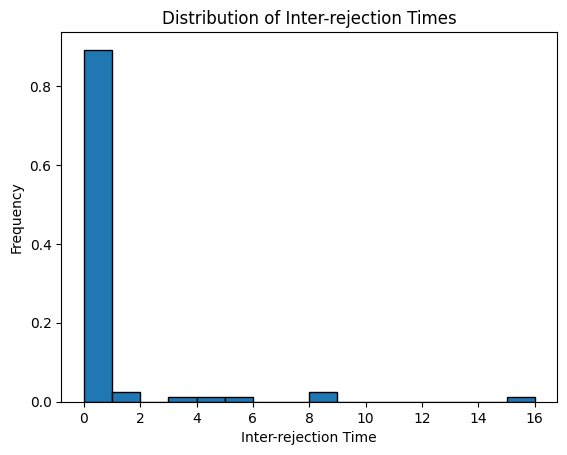

In [ ]:
_, _, accepted_data = output_to_df("output-d.txt")
rejected_data = []
with open('reject_file.txt', 'r') as file:
    for line in file:
      row = line.strip().split(",")
      float_row = [float(x) for x in row]
      rejected_data.append(float_row)

total_accepted = len(accepted_data["RequestID"])
total_rejected = len(rejected_data)

total_requests = total_accepted + total_rejected

print(f"Rejected Requests Ratio: {total_rejected}:{total_accepted}")

rejected_df = pd.DataFrame(rejected_data, columns=["RequestID", "RejectedTimestamp"])

rejected_df["Inter-rejectionTime"] = rejected_df["RejectedTimestamp"].shift(-1) - rejected_df["RejectedTimestamp"]

bin_size = 1
bins = np.arange(0, max(rejected_df["Inter-rejectionTime"]) + bin_size, bin_size)
weights = np.ones(len(rejected_df["Inter-rejectionTime"])) / len(rejected_df["Inter-rejectionTime"])

plt.hist(rejected_df["Inter-rejectionTime"], bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Inter-rejection Times')
plt.xlabel('Inter-rejection Time')
plt.ylabel('Frequency')

plt.show()








It appears that almost all of the rejections came within a second of each other, with inter-rejection times greater than 1 all being very infrequent.

Rejected Requests Ratio: 67:1433


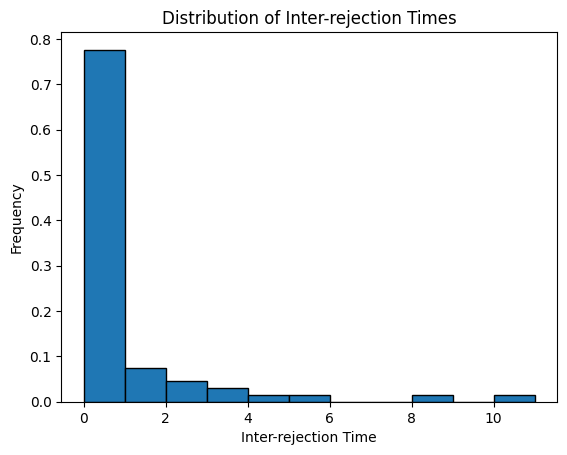

In [ ]:
_, _, accepted_data = output_to_df("output-e.txt")
rejected_data = []
with open('reject_file-e.txt', 'r') as file:
    for line in file:
      row = line.strip().split(",")
      float_row = [float(x) for x in row]
      rejected_data.append(float_row)

total_accepted = len(accepted_data["RequestID"])
total_rejected = len(rejected_data)

total_requests = total_accepted + total_rejected

print(f"Rejected Requests Ratio: {total_rejected}:{total_accepted}")

rejected_df = pd.DataFrame(rejected_data, columns=["RequestID", "RejectedTimestamp"])

rejected_df["Inter-rejectionTime"] = rejected_df["RejectedTimestamp"].shift(-1) - rejected_df["RejectedTimestamp"]

bin_size = 1
bins = np.arange(0, max(rejected_df["Inter-rejectionTime"]) + bin_size, bin_size)
weights = np.ones(len(rejected_df["Inter-rejectionTime"])) / len(rejected_df["Inter-rejectionTime"])

plt.hist(rejected_df["Inter-rejectionTime"], bins=bins, weights=weights, edgecolor='black')
plt.title('Distribution of Inter-rejection Times')
plt.xlabel('Inter-rejection Time')
plt.ylabel('Frequency')

plt.show()

Because there are more instances of inter-rejection times being greater in distribution 1 than distribution 0, there must be fewer rejections happening so distribution 1 will provide a better service to its users.